### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Go through the data, checking missing values and data types

In [119]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [120]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### Finding 1: From the description of the dataframe, it seems that the order_amount has a huge std (41282.54) from mean (3145.13) , that might be the cause of unreasonable AOV

### 2. Visualization of the order_amount column

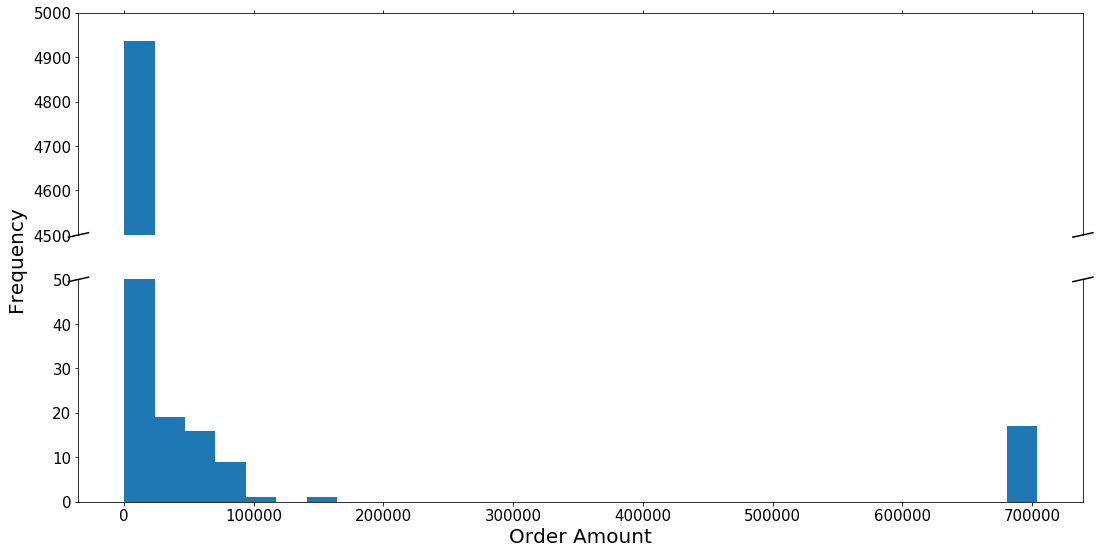

In [118]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (18,9))
ax1.hist(df['order_amount'], bins = 30)
ax2.hist(df['order_amount'], bins = 30)

ax1.set_ylim(4500, 5000) 
ax2.set_ylim(0, 50)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .010 
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

ax2.set_xlabel('Order Amount', fontsize = 20)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
f.text(0.07, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 20)

plt.show()

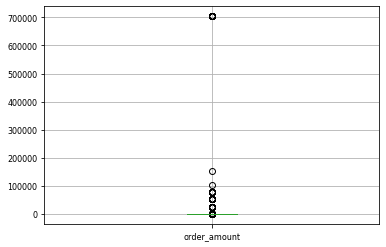

In [121]:
df.boxplot('order_amount')

In [198]:
df['order_amount'].median()

284.0

#### Finding 2: From both histograms and box plots, it shows that there are outliers that are significantly away from the main clusters of data, which has a median of 284.

### 3. Dig into the data

#### Create a new column named price_per_item to check the unit price

In [187]:
df['price_per_item'] =  df['order_amount']/df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


#### Check the price_per_item for those large order_amount

In [199]:
df['price_per_item'].median()

153.0

In [186]:
df.groupby(['order_amount', 'shop_id'])['price_per_item'].value_counts().sort_index(ascending = False).head(10)

order_amount  shop_id  price_per_item
704000        42       352.0             17
154350        78       25725.0            1
102900        78       25725.0            1
77175         78       25725.0            9
51450         78       25725.0           16
25725         78       25725.0           19
1760          42       352.0              1
1408          42       352.0              2
1086          43       181.0              1
1064          54       133.0              1
Name: price_per_item, dtype: int64

In [194]:
df.loc[(df['shop_id']== 78) | (df['shop_id']== 42)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
...,...,...,...,...,...,...,...,...
4745,4746,42,872,352,1,debit,2017-03-24 0:57:24,352.0
4767,4768,42,720,704,2,credit_card,2017-03-14 10:26:08,352.0
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00,352.0
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00,352.0


#### Finding 3: Apparently shop_id with 42 and 78 have exteme large order_amount and strange price_per_item (median is 153.0). Also for the order_amount in shop_id 42, they all have the same user_id, same toral_items and created at the same time 4:00:00 everyday. 
This is probably due to either 1) the shops with id 42 and 78 are located at different countries and using diffrent currencies other U.S. dollars or 2) the extraneous entries are just for missing values. 


### Question a: Think about what could be going wrong with our calculation
Answer: Based on the three findings listed above, the orders_amount columns contains some extraneous values associated with either strange unit price or strange user/time information. Calculate the AOV without considering these values will lead to false conclusions.  

#### Check how much percentile do those extraneous values take in the dataframe

In [163]:
for i in np.linspace (98, 100, 9):
    q = i/100
    print(f"{i} percentile of price_per_item is: {df['price_per_item'].quantile(q=q)}")

98.0 percentile of price_per_item is: 201.0
98.25 percentile of price_per_item is: 352.0
98.5 percentile of price_per_item is: 352.0
98.75 percentile of price_per_item is: 352.0
99.0 percentile of price_per_item is: 352.0
99.25 percentile of price_per_item is: 25725.0
99.5 percentile of price_per_item is: 25725.0
99.75 percentile of price_per_item is: 25725.0
100.0 percentile of price_per_item is: 25725.0


### Question b: Think about a better way to evaluate this data
Answer: So these extraneous values only composed of around 1.75 % of the total amount of data. The best option is to drop these columns containing extraneous values to calculate the mean (AOV). The other option is to use the median value instead of mean to estimate the average order value. 

In [202]:
# new dataframe without outliers
df = df.loc[df['price_per_item']<=201]
df.groupby(['order_amount', 'shop_id'])['price_per_item'].value_counts().sort_index(ascending = False).head(10)

order_amount  shop_id  price_per_item
1086          43       181.0             1
1064          54       133.0             1
980           89       196.0             1
965           50       193.0             1
960           91       160.0             1
              13       160.0             1
948           61       158.0             1
935           51       187.0             1
              6        187.0             2
920           11       184.0             1
Name: price_per_item, dtype: int64

In [203]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


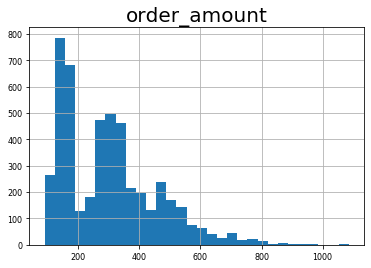

In [205]:
df.hist('order_amount', bins = 30)
plt.show()

### Question c,d: What metric would you report for this dataset? What is its value?

Based on the information above, after remove those extraneous values (equal to 1.75 % of the entire dataset), it does not change the median value but give a better way to calculate the mean. 

The average order value (AOV) from the cleaned dataset is 300.16, which is very close to its median 284.0, as compared to mean-3145.13 and median-284.0 before cleaning the dataset.

I will use either median value as metric to report for this dataset, or I will use mean value after cleaning the dataset to report. 

## Question 2: 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.
